In [51]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage.io import imread, imshow
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, binary_erosion, disk, rectangle, binary_dilation
from skimage.filters import threshold_otsu, rank
from skimage.transform import rescale
from skimage.color import label2rgb

from skimage import data


Pretty printing has been turned OFF


## Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture 
`coins.jpg`.
Therefore, read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

/home/masters/anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


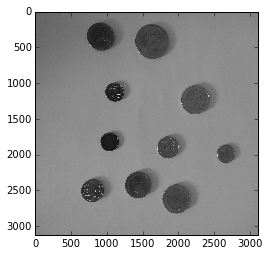

In [4]:
#Path = './images/'
#img = io.imread(Path.__add__('coins.jpg'))
filename = './images/coins.jpg'
img = imread(filename)
img = rgb2gray(img)
coins_im = img_as_ubyte(img)
imshow(coins_im)

coins_im = rescale(coins_im, 1/4)


Subsquently, threshold the image using a global Otsu's thresholding after converting the image into gray scale. Display the image.

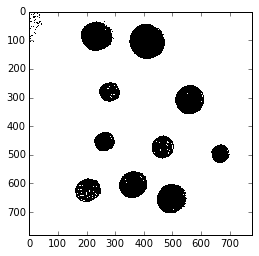

In [6]:

#radius = 15
#selem = disk(radius)
#local_otsu = rank.otsu(coins_im, selem)
threshold_global_otsu = threshold_otsu(coins_im)
global_otsu = coins_im >= threshold_global_otsu

imshow(global_otsu)


Clean the image using some morphological operations, i.e. erosion, dilation, opening, closing ...

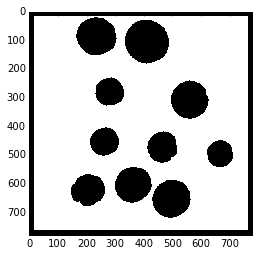

In [25]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(3)
closed = binary_closing(global_otsu, selem)
opened = binary_opening(closed, selem)

selem = disk(15)
eroded = binary_erosion(opened, selem)


imshow(eroded)


Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image.

radius = 67.6157148543
radius = 76.2261678323
radius = 49.581319577
radius = 65.3754299549
radius = 49.5299333012
radius = 52.8925853941
radius = 46.4043788886
radius = 62.9292721554
radius = 56.4697125882
radius = 66.0342875394


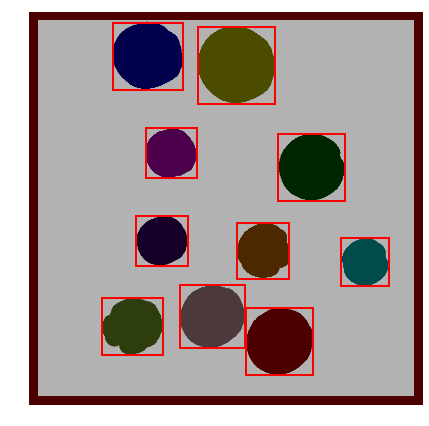

The number of regions is: 10


In [39]:
#labeled_im, num = label(eroded, connectivity=1, return_num=True)
import matplotlib.patches as mpatches
#print(labeled_im)
#imshow(labeled_im)
#print(num)
n = 0
# label image regions
label_image = label(eroded, background=True)
image_label_overlay = label2rgb(label_image, image=eroded)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 100 and region.area <=50000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        radius = region.equivalent_diameter / 2
        print('radius = ' + str(radius))
        n += 1
        ax.add_patch(rect)

ax.set_axis_off()
plt.tight_layout()
plt.show()
print('The number of regions is: ' + str(n))


# http://scikit-image.org/docs/dev/auto_examples/segmentation/plot_label.html

## Segmentation of markers

Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

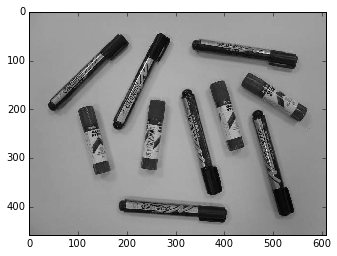

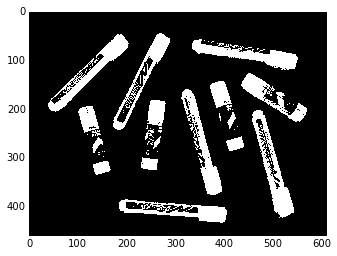

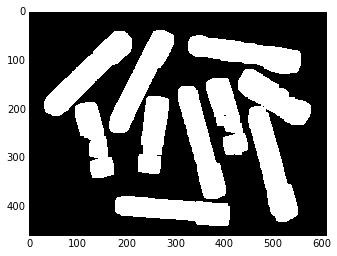

In [61]:
filename = './images/objets4.jpg'
img = imread(filename)
img = rgb2gray(img)
markers_im = img_as_ubyte(img)
imshow(markers_im)

threshold_global_otsu = threshold_otsu(markers_im)
global_otsu = markers_im <= threshold_global_otsu

plt.figure()
imshow(global_otsu)


selem = rectangle(15,15)
closed = binary_dilation(global_otsu, selem)
#opened = binary_opening(closed, selem)



plt.figure()

imshow(closed)



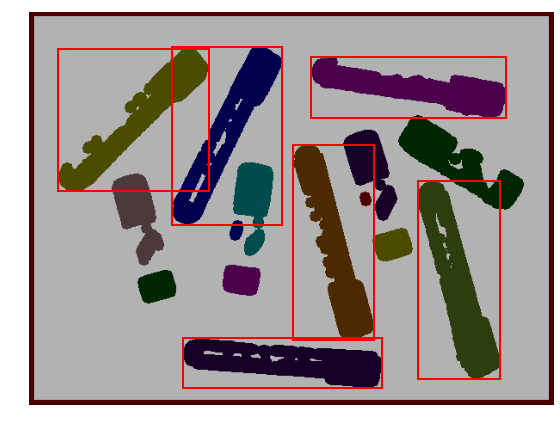

The number of markers is: 6
The number of other things is: 9


In [62]:
n = 0
n2 = 0 
# label image regions
label_image = label(eroded, background=True)
image_label_overlay = label2rgb(label_image, image=eroded)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 7000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        radius = region.equivalent_diameter / 2
        #print('radius = ' + str(radius))
        n += 1
        ax.add_patch(rect)
    else:
        n2+=1
            

            
ax.set_axis_off()
plt.tight_layout()
plt.show()
print('The number of markers is: ' + str(n))
print('The number of other things is: ' + str(n2))

